## Read image

uint8
(800, 800, 3)


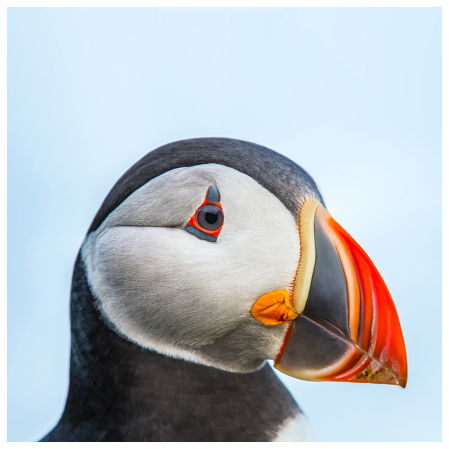

In [50]:
from matplotlib import image
from matplotlib import pyplot as plt
import numpy as np

image = np.copy(image.imread('source.jpg'))
H, W, C = image.shape

print(image.dtype)
print(image.shape)

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()


## Choose best top K for initial centers

In [51]:
# Setup
MAX_ITER = 30
centroids_init = []
LIMIT = 1000
MAX_CLUSTERS = 20

dic_colors = {}
for i in range(H):
    for j in range(W):
        if (image[i, j][0], image[i, j][1], image[i, j][2]) in dic_colors:
            dic_colors[(image[i, j][0], image[i, j][1], image[i, j][2])] += 1
        else:
            dic_colors[(image[i, j][0], image[i, j][1], image[i, j][2])] = 1

top_k = []

for i in dic_colors:
    if dic_colors[i] > limit:
        top_k.append((dic_colors[i], i))

while len(top_k) > MAX_CLUSTERS:
    print(len(top_k), limit)
    top_k = []
    limit = int(limit * 1.5)
    for i in dic_colors:
        if dic_colors[i] > limit:
            top_k.append((dic_colors[i], i))

print(len(top_k))
print("Initial centroids are:")

for i in top_k:
    centroids_init.append(i[1])

centroids = np.array(centroids_init)
print(centroids)



14
Initial centroids are:
[[212 235 251]
 [213 236 252]
 [215 237 251]
 [216 238 252]
 [217 239 253]
 [217 239 252]
 [221 240 254]
 [220 239 253]
 [222 241 255]
 [219 241 254]
 [218 240 253]
 [208 234 251]
 [207 233 250]
 [225 243 255]]


## Update centers

In [52]:
cluster_info = np.zeros(shape=(H, W, 1))

for m in range(0, MAX_ITER):
    print('Iteration number ',m+1)
    # Loop to determine nearest centroid for each pixel
    for i in range(0, H):
        for j in range(0, W):
            distances = centroids - image[i][j]
            dist = np.sum(distances**2, axis=1)
            cluster_info[i][j] = np.argmin(dist, axis=0)

    # Update Centroids
    new_cent = []
    for k in range(0, len(centroids)):
        cluster = []
        np_cluster = None
        # select all points with centroid k from cluster_info
        for i in range(0, H):
            for j in range(0, W):
                if cluster_info[i][j] == k:
                    cluster.append(image[i][j])

        np_cluster = np.array(cluster)
        new_cent.append(np.mean(cluster, axis=0))

    new_centroids = np.array(new_cent)
    total_dif = 0
    print('Number of remaining centroids : ', len(new_centroids))
    if len(new_centroids) == len(centroids):
        for i in range(len(centroids)):
            total_dif += (centroids[i][0] - new_centroids[i][0])**2 + (
                centroids[i][1] - new_centroids[i][1])**2 + (centroids[i][2] - new_centroids[i][2])**2
        print('Diffrence of centroids : ' + str(total_dif))
        print('===========================')
        
        if total_dif < 200:
            break
    
    centroids = new_centroids

print('Final centroids : ',centroids)


Iteration number  1
Number of remaining centroids :  14
Diffrence of centroids : 145826.41483530545
Iteration number  2
Number of remaining centroids :  14
Diffrence of centroids : 30865.535279591983
Iteration number  3
Number of remaining centroids :  14
Diffrence of centroids : 7043.753115445586
Iteration number  4
Number of remaining centroids :  14
Diffrence of centroids : 7745.535723600201
Iteration number  5
Number of remaining centroids :  14
Diffrence of centroids : 2719.6759910044093
Iteration number  6
Number of remaining centroids :  14
Diffrence of centroids : 1446.1197743094021
Iteration number  7
Number of remaining centroids :  14
Diffrence of centroids : 798.0344322705639
Iteration number  8
Number of remaining centroids :  14
Diffrence of centroids : 359.7989993848109
Iteration number  9
Number of remaining centroids :  14
Diffrence of centroids : 334.57212092343866
Iteration number  10
Number of remaining centroids :  14
Diffrence of centroids : 387.8230922602113
Iter

## Create image based on centers

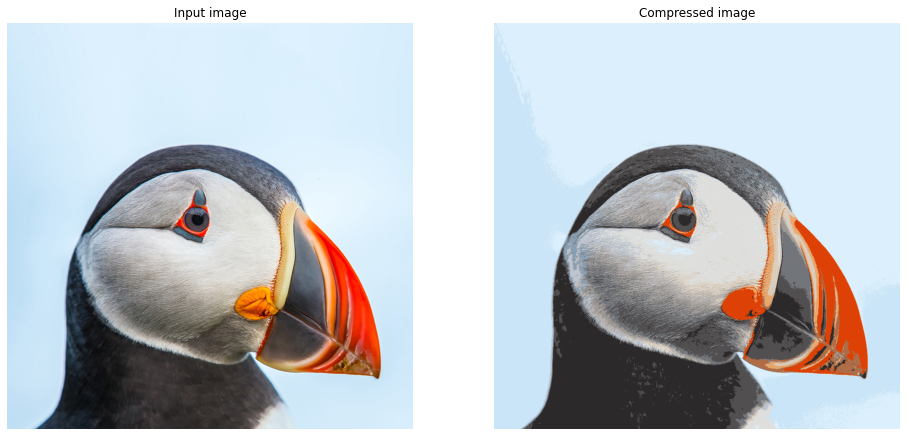

In [56]:
image_updated = np.zeros((H, W, C))
cluster_info = cluster_info. astype('i')

for i in range(0, H):
    for j in range(0, W):
        image_updated[i, j, :] = centroids[cluster_info[(i,j)]]


plt.figure(figsize=(16, 16))

plt.subplot(1, 2, 1)
plt.title('Input image')
plt.imshow(image, vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Compressed image')
plt.imshow(image_updated.astype('uint8'), vmin=0, vmax=255)
plt.axis('off')
plt.imsave('K_means_compressed.png',image_updated.astype('uint8'), vmin=0, vmax=255)
plt.show()
